# **AI ASSIGNMENT-02**

# **NAME:K.SAI ROHITH REDDY**

# **REGNO:20MID0084**

# **EMAIL:sairohith.reddyk2020@vitstudent.ac.in**

# **CAMPUS:VIT VELLORE**

In [14]:
#Importing libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

In [15]:
#Load the dataset
df = pd.read_csv('drug200.csv')

In [16]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [17]:
#checking null values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [18]:
#Dataset information
df.info

<bound method DataFrame.info of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

In [19]:
#statistical info
df.describe

<bound method NDFrame.describe of      Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]>

<Axes: xlabel='Sex', ylabel='count'>

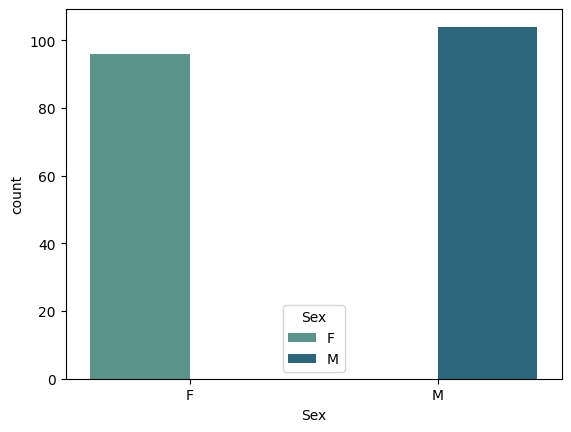

In [20]:
#Visualization using seaborn
sns.countplot(x='Sex',data=df,palette='crest',hue='Sex')

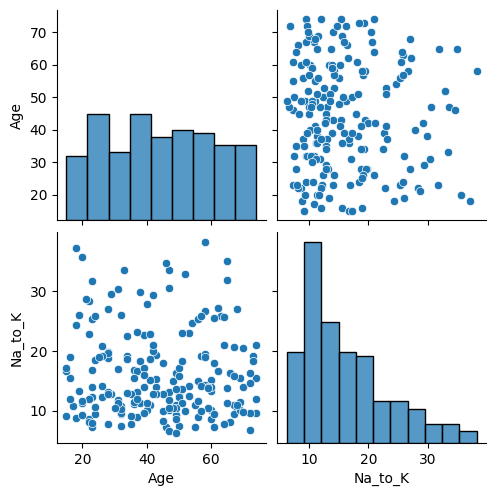

In [21]:
sns.pairplot(data=df)

<Axes: xlabel='Drug', ylabel='count'>

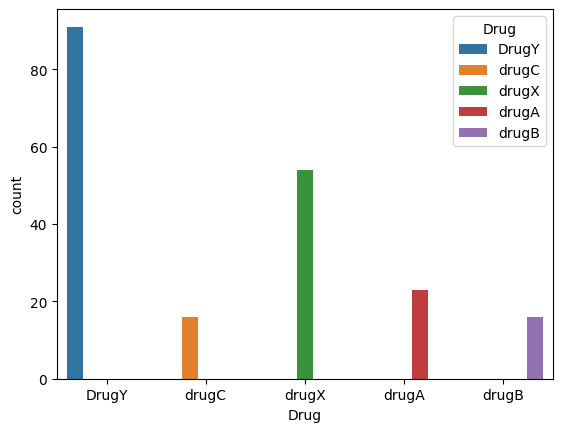

In [22]:
sns.countplot(x='Drug',data=df,hue='Drug')

<Axes: xlabel='Na_to_K', ylabel='Count'>

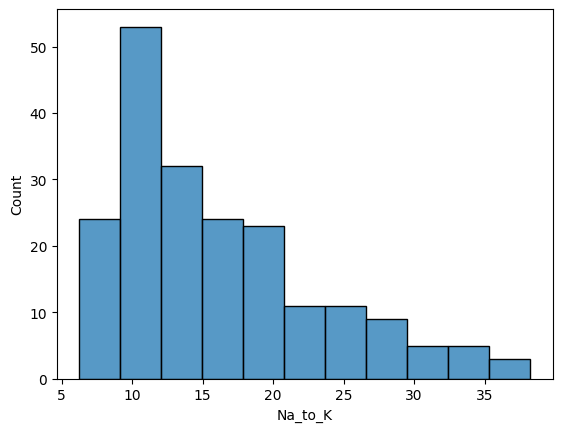

In [23]:
sns.histplot(x='Na_to_K',data=df)

In [24]:
#splitting data into the train & test
X = df.drop(columns = ['Drug'],axis=1)
Y = df['Drug']

In [25]:
#Drug column is the output(target) column in this dataset.
Y_class = len(np.unique(Y))
print(Y_class)

5


In [26]:
#Convert the Categorical data into interger data
X = pd.get_dummies(X,columns=['Sex','BP','Cholesterol'],drop_first = True)
LE = LabelEncoder()
Y = LE.fit_transform(Y)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split (X,Y,test_size=0.3,random_state=42)

In [28]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [29]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [30]:
#task-02:Build the ANN model with (input layer, min 3 hidden layers & output layer)
#Creating a ann model
model = Sequential()
#input layer
model.add(Dense(48, input_dim=6, activation='relu'))
#adding hidden layer-01
model.add(Dense(36, activation='relu'))
#adding hidden layer-02
model.add(Dense(24, activation='relu'))
#adding hidden layer-03
model.add(Dense(12, activation='relu'))
#output-layer
output_layer = Dense(Y_class,activation='softmax')
model.add(output_layer)

In [31]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 48)                336       
                                                                 
 dense_1 (Dense)             (None, 36)                1764      
                                                                 
 dense_2 (Dense)             (None, 24)                888       
                                                                 
 dense_3 (Dense)             (None, 12)                300       
                                                                 
 dense_4 (Dense)             (None, 5)                 65        
                                                                 
Total params: 3,353
Trainable params: 3,353
Non-trainable params: 0
_________________________________________________________________


In [32]:
#compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X_train,Y_train,epochs=40,batch_size=6)


Epoch 1/40
24/24 [==============================] - 1s 4ms/step - loss: 1.5750 - accuracy: 0.2000
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 1.4707 - accuracy: 0.4143
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 1.3384 - accuracy: 0.4786
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 1.1102 - accuracy: 0.4929
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.9268 - accuracy: 0.5786
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.7741 - accuracy: 0.6857
Epoch 7/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.8429
Epoch 8/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.8714
Epoch 9/40
24/24 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8786
Epoch 10/40
24/24 [==============================] - 0s 3ms/step - loss: 0.3443 - accuracy: 0.8929
Epoch 11/40
24/24 [

In [34]:
#evaluation and testing with data
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc * 100)

2/2 [==============================] - 0s 9ms/step - loss: 0.2167 - accuracy: 0.9333
Test accuracy: 93.33333373069763
